In [4]:
from bs4 import BeautifulSoup

In [5]:
with open('index.html', 'r') as f:
    soup = BeautifulSoup(f, 'html.parser')
    print(soup.prettify())

<!DOCTYPE html>
<html lang="en">
 <head>
  <meta charset="utf-8"/>
  <meta content="width=device-width, initial-scale=1.0" name="viewport"/>
  <title>
   For Web Scraping
  </title>
 </head>
 <body>
  <div>
   <h1>
    HTML file for web scraping
   </h1>
   <h2>
    Advanced python class
   </h2>
   <h3>
    Lecturer Pukar Karki
   </h3>
   <a href="https://google.com">
    Link to google
   </a>
  </div>
 </body>
</html>



In [6]:
data = soup.find_all("h2")
for value in data:
    print(value.text)

Advanced python class


In [7]:
import requests
url = 'https://ekantipur.com'
response = requests.get(url)
if response.status_code == 200:
    data = response.text
    soup = BeautifulSoup(data, 'html.parser')
    print(soup.prettify())
else:
    print(f'Response {response.status_code}')

<!DOCTYPE html>
<html lang="ne">
 <head>
  <meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta content="Kantipur Daily is Nepal's no 1 Nepali news portal and Kantipur Daily's official website. This delivers the latest breaking news and information on latest top stories, national, international, politics, sports, business, finance, entertainment, photo-gallery, audio, video and more." name="description"/>
  <meta content="Nepal News, Online News from Nepal, Nepali News, Political, Science, Social, Sport, Ecomony, Business,Entertainment, Nepali Movie, Songs, Nepali Model, Actor,Audio, Video, Interview, Nepali Filmi News, Poems, Business news, Views, Reviews" name="keyword"/>
  <meta content="index, follow" name="robots"/>
  <meta content="Nepali" name="language"/>
  <meta content="" name="reply-to"/>
  <meta content="1 day" name="revisit-after"/>
  <meta content="https://assets-cdn.ekantipur.com/uploads/sou

In [8]:
import pandas as pd
news = soup.find_all("h2")
final_data = []
for val in news:
    text_data = val.text
    link_data = val.a 
    if link_data:
        link = link_data["href"]
    if len(text_data)>20:
        final_data.append({
            "headline":text_data,
            "link": link
        })

df = pd.DataFrame(final_data)
df.to_csv('news.csv', index=False)


In [9]:
import requests
url = 'https://www.reddit.com/'
response = requests.get(url)
if response.status_code == 200:
    data = response.text
    soup = BeautifulSoup(data, 'html.parser')
    print(soup.prettify())
else:
    print(f'Response {response.status_code}')

<!DOCTYPE html>
<html class="theme-beta" device="mobile" dir="ltr" lang="en-US">
 <head prefix="og: https://ogp.me/ns#">
  <title>
   Reddit - The heart of the internet
  </title>
  <meta content="width=device-width, initial-scale=1, viewport-fit=cover" name="viewport"/>
  <meta content="yes" name="apple-mobile-web-app-capable"/>
  <meta content="black" name="apple-mobile-web-app-status-bar-style"/>
  <meta content="#000000" name="msapplication-navbutton-color"/>
  <meta content="#000000" name="theme-color"/>
  <meta content="Reddit is where millions of people gather for conversations about the things they care about, in over 100,000 subreddit communities." name="description"/>
  <meta content="https://www.redditstatic.com/shreddit/assets/favicon/192x192.png" property="og:image"/>
  <meta content="256" property="og:image:width"/>
  <meta content="256" property="og:image:height"/>
  <meta content="Reddit" property="og:site_name"/>
  <meta content="reddit" property="og:title"/>
  <meta c

In [10]:
import pandas as pd
import random
import tqdm
names = ["Ram", "Shyam", "Hari", "Gopal", "Sita"]
data_list = []
for i in tqdm.tqdm(range(1,1000001)):
    data_list.append({
        "Roll": i,
        "Name":  names[random.randint(0,4)],
        "Salary":10000*random.random()
        })
    
df = pd.DataFrame(data_list)
df.to_csv("big_data.csv",index=False)


100%|██████████| 1000000/1000000 [00:01<00:00, 859982.66it/s]


In [11]:
filename ="big_data.csv"
output_file = "out_data.csv"
first_chunk = True
for chunk in pd.read_csv(filename, chunksize=10000):
    chunk["Gender"] = chunk["Name"].apply(lambda x:"Female" if x == "Sita" else "Male")
    chunk.to_csv(
        output_file,
        mode="w" if first_chunk else "a",
        header=first_chunk,
        index=False
    )

In [13]:
import pandas as pd
data = {
    "Name": ["Ram", "Shyam", "Bishnu", "Brahma", "Krishna", "Laxmi"],
    "Salary":[1000, 1050, 2000, 2010, 1090, 999]
}

df = pd.DataFrame(data)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Name    6 non-null      object
 1   Salary  6 non-null      int64 
dtypes: int64(1), object(1)
memory usage: 228.0+ bytes
None


In [14]:
df["Gender"] = df["Name"].apply(lambda x:"Female" if x == "Laxmi" else "Male")
df.head()

,Name,Salary,Gender
0,Ram,1000,Male
1,Shyam,1050,Male
2,Bishnu,2000,Male
3,Brahma,2010,Male
4,Krishna,1090,Male


<Figure size 600x400 with 0 Axes>

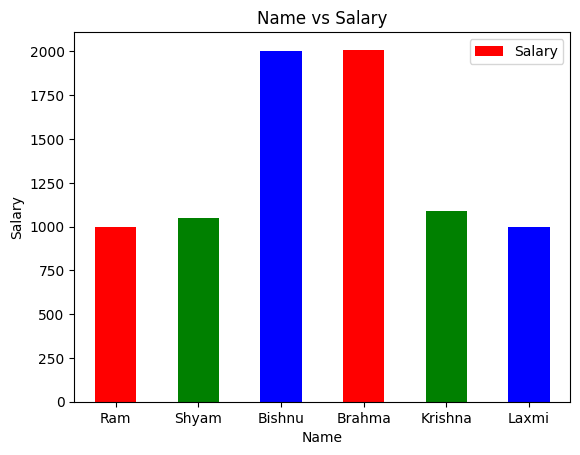

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))
df.plot.bar(x='Name', y='Salary', color=["Red","Green","Blue"])
plt.xlabel('Name')
plt.ylabel("Salary")
plt.xticks(rotation=0)
plt.title('Name vs Salary')
plt.savefig('barplot.svg', format='svg')
plt.show()

In [16]:
df_A = pd.DataFrame({
    'Roll':[1,2,3],
    'Name':["Ram", "Shyam", "Hari"]
})
df_B = pd.DataFrame({
    'Roll':[1,2,4],
    'Percentage':[60.0, 70.0, 80.0]
})
inner_merge = pd.merge(df_A, df_B, on="Roll", how="inner")
print(inner_merge)
# Task: EXPLORE left, right, inner

   Roll   Name  Percentage
0     1    Ram        60.0
1     2  Shyam        70.0


In [17]:
outer_merge = pd.merge(df_A, df_B, on="Roll", how="outer")
print(outer_merge)
# Task: EXPLORE left, right, inner

   Roll   Name  Percentage
0     1    Ram        60.0
1     2  Shyam        70.0
2     3   Hari         NaN
3     4    NaN        80.0
